In [1]:
import pandas as pd
traindf = pd.read_csv("train.csv", encoding="utf-8")
testdf = pd.read_csv("test.csv", encoding="utf-8")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# 訓練資料補數字型態的缺失直
med = traindf.median()
traindf = traindf.fillna(med)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# 訓練資料補類別型態的缺失直
mostfrequent = traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"] = traindf["Embarked"].fillna(mostfrequent)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
# 測試資料再補的時候, 請補訓練資料拿到的值
testdf = testdf.fillna(med)
testdf["Embarked"] = testdf["Embarked"].fillna(mostfrequent)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
# 針對類別資料: One-Hot Encoding
dummies = pd.get_dummies(traindf["Embarked"])
traindf = pd.concat([traindf, dummies], axis=1)
dummies = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummies], axis=1)
dummies = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf, dummies], axis=1)
dummies = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf, dummies], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0,1,0


In [19]:
def cutflow(data):
    return data.split(",")[-1].split(".")[0].replace(" ", "")
s = traindf["Name"].apply(cutflow)
pd.crosstab(traindf["Survived"], s)

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [20]:
def cutflow(data):
    middle = data.split(",")[-1].split(".")[0].replace(" ", "")
    if middle == "Miss":
        return "Miss"
    elif middle == "Mr":
        return "Mr"
    elif middle == "Mrs":
        return "Mrs"
    else:
        return "Throw"
traindf["Name"] = traindf["Name"].apply(cutflow)
dummies = pd.get_dummies(traindf["Name"])
traindf = pd.concat([traindf, dummies], axis=1)

testdf["Name"] = testdf["Name"].apply(cutflow)
dummies = pd.get_dummies(testdf["Name"])
testdf = pd.concat([testdf, dummies], axis=1)

traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
5,6,0,3,Mr,male,28.0,0,0,330877,8.4583,...,Q,0,1,0,0,1,0,1,0,0
6,7,0,1,Mr,male,54.0,0,0,17463,51.8625,...,S,0,0,1,0,1,0,1,0,0
7,8,0,3,Throw,male,2.0,3,1,349909,21.0750,...,S,0,0,1,0,1,0,0,0,1
8,9,1,3,Mrs,female,27.0,0,2,347742,11.1333,...,S,0,0,1,1,0,0,0,1,0
9,10,1,2,Mrs,female,14.0,1,0,237736,30.0708,...,C,1,0,0,1,0,0,0,1,0


In [23]:
traindf = traindf.drop(["Sex", "Embarked", "Name", "Throw", "Ticket", "Cabin"], axis=1)
testdf = testdf.drop(["Sex", "Embarked", "Name", "Throw", "Ticket", "Cabin"], axis=1)
traindf

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
5,6,0,3,28.0,0,0,8.4583,0,1,0,0,1,0,1,0
6,7,0,1,54.0,0,0,51.8625,0,0,1,0,1,0,1,0
7,8,0,3,2.0,3,1,21.0750,0,0,1,0,1,0,0,0
8,9,1,3,27.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,10,1,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,1


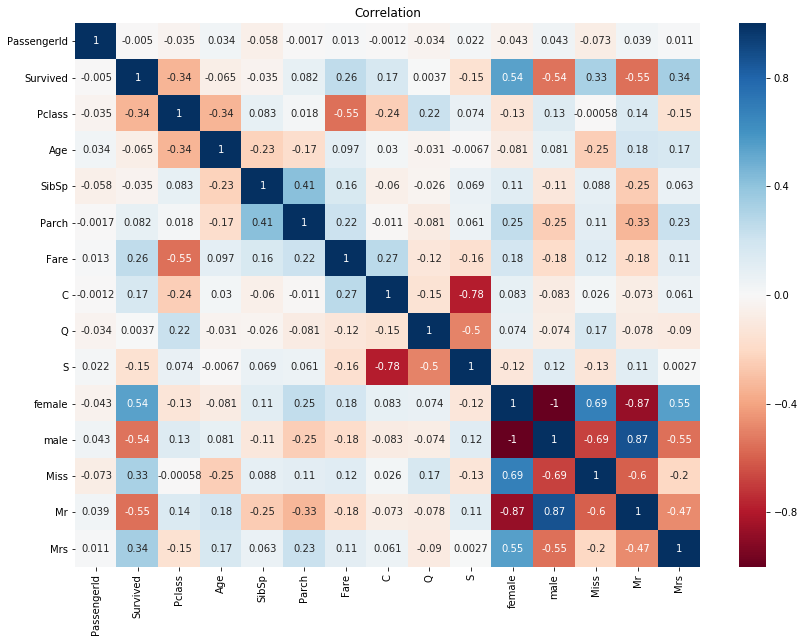

In [29]:
# https://matplotlib.org/users/colormaps.html
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(14, 10))
plt.title("Correlation")
sns.heatmap(traindf.corr(), annot=True, cmap="RdBu")